#### Imports

In [1]:
import numpy as np 
import pandas as pd 

import allensdk
import allensdk.brain_observatory.behavior.behavior_project_cache as bpc

import matplotlib.pyplot as plt 
import matplotlib
import seaborn as sns

import sklearn
from sklearn.decomposition import PCA

import torch
from torch import nn
from torchvision.transforms import Resize

sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})
matplotlib.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['figure.dpi'] = 150

C:\Users\abalwani6\AppData\Local\anaconda3\envs\allensdk\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
cache_dir = r"Data"
bc = bpc.VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=cache_dir)

In [4]:
behavior_session_table = bc.get_behavior_session_table()  
ophys_session_table = bc.get_ophys_session_table()   
experiment_table = bc.get_ophys_experiment_table()

print(f"Number of behavior sessions = {len(behavior_session_table)}")
print(f"Number of ophys sessions = {len(ophys_session_table)}")
print(f"Number of ophys experiments = {len(experiment_table)}")

Number of behavior sessions = 4782
Number of ophys sessions = 703
Number of ophys experiments = 1936


In [5]:
behavior_session_table.keys()

Index(['ophys_session_id', 'ophys_container_id', 'mouse_id', 'indicator',
       'full_genotype', 'driver_line', 'cre_line', 'reporter_line', 'sex',
       'age_in_days', 'project_code', 'session_type', 'session_number',
       'image_set', 'behavior_type', 'experience_level',
       'prior_exposures_to_session_type', 'prior_exposures_to_image_set',
       'prior_exposures_to_omissions', 'date_of_acquisition', 'equipment_name',
       'imaging_plane_group_count', 'go_trial_count', 'ophys_experiment_id',
       'false_alarm_trial_count', 'engaged_trial_count', 'trial_count',
       'num_targeted_structures', 'hit_trial_count',
       'correct_reject_trial_count', 'num_depths_per_area',
       'catch_trial_count', 'miss_trial_count', 'file_id'],
      dtype='object')

In [6]:
ophys_session_table.keys()

Index(['behavior_session_id', 'ophys_container_id', 'mouse_id', 'indicator',
       'full_genotype', 'driver_line', 'cre_line', 'reporter_line', 'sex',
       'age_in_days', 'project_code', 'session_type', 'session_number',
       'image_set', 'behavior_type', 'experience_level',
       'prior_exposures_to_session_type', 'prior_exposures_to_image_set',
       'prior_exposures_to_omissions', 'date_of_acquisition', 'equipment_name',
       'num_targeted_structures', 'num_depths_per_area',
       'imaging_plane_group_count', 'ophys_experiment_id'],
      dtype='object')

In [7]:
print(experiment_table[experiment_table['behavior_session_id'] == 877287655]['targeted_structure'])
print(experiment_table[experiment_table['behavior_session_id'] == 877287655]['targeted_imaging_depth'])
print(experiment_table[experiment_table['behavior_session_id'] == 877287655]['cre_line'])

ophys_experiment_id
877696762    VISp
Name: targeted_structure, dtype: object
ophys_experiment_id
877696762    175
Name: targeted_imaging_depth, dtype: int64
ophys_experiment_id
877696762    Slc17a7-IRES2-Cre
Name: cre_line, dtype: object


In [8]:
experiment_table.keys()

Index(['behavior_session_id', 'ophys_session_id', 'ophys_container_id',
       'mouse_id', 'indicator', 'full_genotype', 'driver_line', 'cre_line',
       'reporter_line', 'sex', 'age_in_days', 'imaging_depth',
       'targeted_structure', 'targeted_imaging_depth', 'imaging_plane_group',
       'project_code', 'session_type', 'session_number', 'image_set',
       'behavior_type', 'passive', 'experience_level',
       'prior_exposures_to_session_type', 'prior_exposures_to_image_set',
       'prior_exposures_to_omissions', 'date_of_acquisition', 'equipment_name',
       'published_at', 'isi_experiment_id', 'file_id'],
      dtype='object')

In [9]:
# PC, ViP, SST lines 
pc_line_str = 'Slc17a7-IRES2-Cre' 
sst_line_str = 'Sst-IRES-Cre'
vip_line_str = 'Vip-IRES-Cre'  

In [10]:
# filtering by cell type 
pc_exp_table = experiment_table[(experiment_table.cre_line==pc_line_str)]
vip_exp_table = experiment_table[(experiment_table.cre_line==vip_line_str)]
sst_exp_table = experiment_table[(experiment_table.cre_line==sst_line_str)]

# numbers 
print(f"Number of experiments with PC neurons = {len(pc_exp_table)}")
print(f"Number of experiments with VIP neurons = {len(vip_exp_table)}")
print(f"Number of experiments with SST neurons = {len(sst_exp_table)}")

Number of experiments with PC neurons = 871
Number of experiments with VIP neurons = 663
Number of experiments with SST neurons = 402


In [11]:
# pc_exp_table[pc_exp_table]

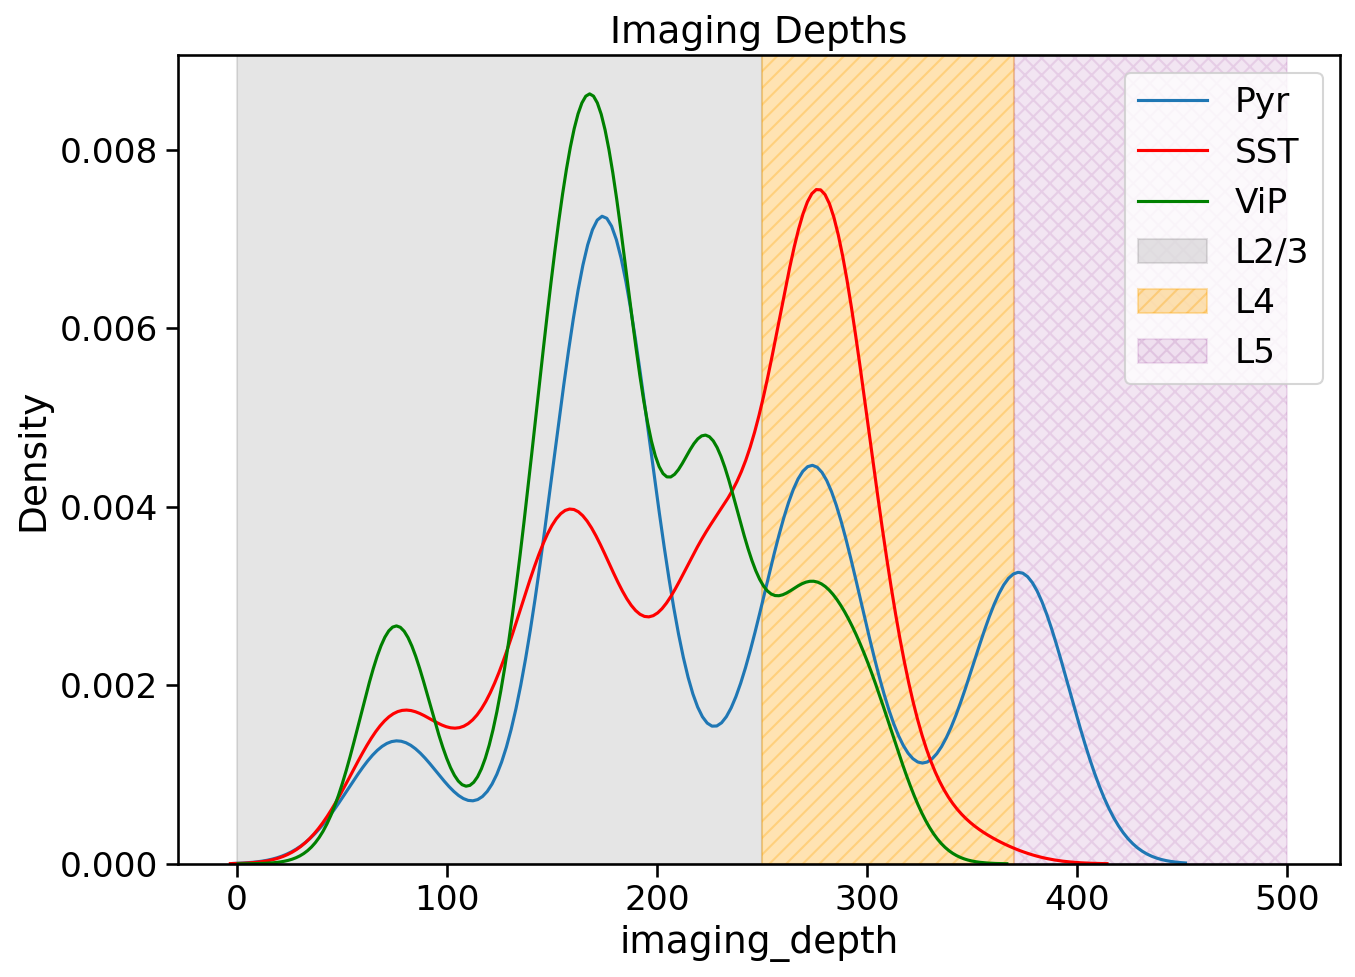

In [12]:
sns.kdeplot(data=pc_exp_table, x="imaging_depth",label='Pyr')
sns.kdeplot(data=sst_exp_table, x="imaging_depth",color='r',label='SST')
sns.kdeplot(data=vip_exp_table, x="imaging_depth",color='g',label='ViP')

# Add shaded panels
# L23_start, L23_end = 125, 185  # define the range for L23
# L4_start, L4_end = 160, 210  # define the range for L4
# L5_start, L5_end = 220, 300  # define the range for L5

L23_start, L23_end = 0, 250 # define the range for L23
L4_start, L4_end = 250, 370  # define the range for L4
L5_start, L5_end = 370, 500  # define the range for L5


plt.axvspan(L23_start, L23_end, color='k',hatch='', alpha=0.1, label='L2/3')
plt.axvspan(L4_start, L4_end, color='orange',hatch='///', alpha=0.3, label='L4')
plt.axvspan(L5_start, L5_end, color='purple',hatch='xxx', alpha=0.1, label='L5')

plt.title('Imaging Depths')
plt.legend()

In [13]:
depths_pyr = pc_exp_table.imaging_depth
depths_sst = sst_exp_table.imaging_depth
depths_vip = vip_exp_table.imaging_depth

In [14]:
pc_exp_table.session_type

ophys_experiment_id
877696762     OPHYS_2_images_A_passive
879332693             OPHYS_1_images_A
880375092             OPHYS_4_images_B
881881171             OPHYS_6_images_B
882935355             OPHYS_6_images_B
                        ...           
1051216600            OPHYS_4_images_A
775614751             OPHYS_1_images_A
778644591     OPHYS_2_images_A_passive
788490510             OPHYS_6_images_B
796106850     OPHYS_5_images_B_passive
Name: session_type, Length: 871, dtype: object

In [15]:
pc_exp_table.prior_exposures_to_image_set

ophys_experiment_id
877696762     29
879332693     31
880375092      0
881881171      2
882935355      3
              ..
1051216600     5
775614751     44
778644591     47
788490510      5
796106850      9
Name: prior_exposures_to_image_set, Length: 871, dtype: int64

In [11]:
print('Pyr:',np.unique(depths_pyr))
print('SST:',np.unique(depths_sst))
print('ViP:',np.unique(depths_vip))

Pyr: [ 67  69  71  73  75  77  79  81  83  85  91  95 141 145 146 148 150 152
 159 161 163 165 167 169 170 171 173 174 175 177 179 181 182 183 185 187
 195 197 221 223 225 227 229 251 253 255 257 259 261 263 265 267 269 270
 271 272 273 275 276 277 279 280 281 283 285 289 291 295 298 300 302 308
 340 345 355 359 361 363 365 367 369 371 373 375 377 379 381 383]
SST: [ 61  65  71  73  75  81  83 101 103 105 107 109 110 111 121 123 125 135
 137 139 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161 165 167 169 170 171 173 175 177 178 179 180 181 182 183 205 210
 213 215 218 219 220 221 222 225 226 227 228 229 230 231 232 233 235 240
 260 263 265 267 268 269 270 271 273 275 277 279 280 281 283 284 285 286
 287 289 290 292 294 298 300 304 306 308 315 320 321 322 348 350]
ViP: [ 51  69  71  73  75  77  79  81  83  85  87  93 117 121 124 128 130 132
 133 134 135 140 142 143 144 146 147 148 149 150 151 152 153 154 155 156
 158 159 160 161 162 163 165 166 167 169 170 171 1

In [12]:
pyr_visp = pc_exp_table[pc_exp_table.targeted_structure=='VISp']
sst_visp = sst_exp_table[sst_exp_table.targeted_structure=='VISp']
vip_visp = vip_exp_table[vip_exp_table.targeted_structure=='VISp']

pyr_visl = pc_exp_table[pc_exp_table.targeted_structure=='VISl']
sst_visl = sst_exp_table[sst_exp_table.targeted_structure=='VISl']
vip_visl = vip_exp_table[vip_exp_table.targeted_structure=='VISl']

In [13]:
np.unique(pc_exp_table.targeted_structure)

array(['VISal', 'VISam', 'VISl', 'VISp'], dtype=object)

In [57]:
pyr_visp_L23_ophys_ids = pyr_visp[(pyr_visp['imaging_depth'] >= L23_start) & (pyr_visp['imaging_depth'] <= L23_end)]['ophys_session_id']
sst_visp_L23_ophys_ids = sst_visp[(sst_visp['imaging_depth'] >= L23_start) & (sst_visp['imaging_depth'] <= L23_end)]['ophys_session_id']
vip_visp_L23_ophys_ids = vip_visp[(vip_visp['imaging_depth'] >= L23_start) & (vip_visp['imaging_depth'] <= L23_end)]['ophys_session_id']

pyr_visp_L4_ophys_ids = pyr_visp[(pyr_visp['imaging_depth'] >= L4_start) & (pyr_visp['imaging_depth'] <= L4_end)]['ophys_session_id']
sst_visp_L4_ophys_ids = sst_visp[(sst_visp['imaging_depth'] >= L4_start) & (sst_visp['imaging_depth'] <= L4_end)]['ophys_session_id']
vip_visp_L4_ophys_ids = vip_visp[(vip_visp['imaging_depth'] >= L4_start) & (vip_visp['imaging_depth'] <= L4_end)]['ophys_session_id']

pyr_visp_L5_ophys_ids = pyr_visp[(pyr_visp['imaging_depth'] >= L5_start) & (pyr_visp['imaging_depth'] <= L5_end)]['ophys_session_id']
sst_visp_L5_ophys_ids = sst_visp[(sst_visp['imaging_depth'] >= L5_start) & (sst_visp['imaging_depth'] <= L5_end)]['ophys_session_id']
vip_visp_L5_ophys_ids = vip_visp[(vip_visp['imaging_depth'] >= L5_start) & (vip_visp['imaging_depth'] <= L5_end)]['ophys_session_id']

In [59]:
pyr_visl_L23_ophys_ids = pyr_visl[(pyr_visl['imaging_depth'] >= L23_start) & (pyr_visl['imaging_depth'] <= L23_end)]['ophys_session_id']
sst_visl_L23_ophys_ids = sst_visl[(sst_visl['imaging_depth'] >= L23_start) & (sst_visl['imaging_depth'] <= L23_end)]['ophys_session_id']
vip_visl_L23_ophys_ids = vip_visl[(vip_visl['imaging_depth'] >= L23_start) & (vip_visl['imaging_depth'] <= L23_end)]['ophys_session_id']

pyr_visl_L4_ophys_ids = pyr_visl[(pyr_visl['imaging_depth'] >= L4_start) & (pyr_visl['imaging_depth'] <= L4_end)]['ophys_session_id']
sst_visl_L4_ophys_ids = sst_visl[(sst_visl['imaging_depth'] >= L4_start) & (sst_visl['imaging_depth'] <= L4_end)]['ophys_session_id']
vip_visl_L4_ophys_ids = vip_visl[(vip_visl['imaging_depth'] >= L4_start) & (vip_visl['imaging_depth'] <= L4_end)]['ophys_session_id']

pyr_visl_L5_ophys_ids = pyr_visl[(pyr_visl['imaging_depth'] >= L5_start) & (pyr_visl['imaging_depth'] <= L5_end)]['ophys_session_id']
sst_visl_L5_ophys_ids = sst_visl[(sst_visl['imaging_depth'] >= L5_start) & (sst_visl['imaging_depth'] <= L5_end)]['ophys_session_id']
vip_visl_L5_ophys_ids = vip_visl[(vip_visl['imaging_depth'] >= L5_start) & (vip_visl['imaging_depth'] <= L5_end)]['ophys_session_id']

In [129]:
(pyr_visp_L23_ophys_ids.head())

ophys_experiment_id
877696762    877103886
879332693    878436988
880375092    879719132
881881171    881071629
882935355    882620042
Name: ophys_session_id, dtype: int64

In [131]:
np.argwhere(pc_exp_table.index == pc_exp_table[pc_exp_table['ophys_session_id'] == 878436988].index[0])[0][0]

1

In [114]:
# np.argwhere(sst_exp_table.index == sst_exp_table[sst_exp_table['ophys_session_id'] == 951410079].index[0])[0][0]

In [125]:
# np.argwhere(vip_exp_table.index == vip_exp_table[vip_exp_table['ophys_session_id'] == 1097893149].index[0])[0][0]

199